## Francisco Alonso Fernández. 
### Máster en Data Science y Big Data. Afi Escuela de Finanzas.

In [1]:
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
El código de este notebook está oculto por defecto para una lectura más fácil.
Para mostrarlo/ocultarlo haz click <a href="javascript:code_toggle()">aquí</a>.''')
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
El código de este notebook está oculto por defecto, para una lectura más fácil.
Para mostrarlo/ocultarlo haz click <a href="javascript:code_toggle()">aquí</a>.''')

In [3]:
import re
import nltk
import nltk.data

#nltk.download('wordnet')
#nltk.download('omw')
#nltk.download('omw')
#nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk.draw import dispersion_plot
from nltk import pos_tag

import spicy

import numpy as np
import pandas as pd
import matplotlib as plt

In [4]:
def potter_analysis(book_number):
    
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    book = 'Book'+str(book_number)+'.txt'
    
    #Leemos el fichero en una cadena
    with open(book, 'r',encoding="utf8") as file:
        harry_potter = file.read().replace('\n', ' ')
    
    #Contamos el número de caracteres leídos
    aux1 = len(harry_potter)
        
    #Contamos el número de frases
    aux2 = len(tokenizer.tokenize(harry_potter))
        
    #Contamos el número de palabras
    aux3 = len(word_tokenize(harry_potter))
        
    #Calculamos la media de palabras por frase en el texto
    media = []

    for sentence in tokenizer.tokenize(harry_potter):
        media.append(len(word_tokenize(sentence)))
            
    aux4 = np.array(media).mean()
        
    #Motamos un DataFrame con toda esta información
    df_aux = pd.DataFrame([[aux2,aux3,aux4,aux1]], columns=['Número de frases en el libro','Número de palabras en el libro','Número medio de palabras por frase','Número de caracteres en el libro'])
        
        
    #Vamos a crear un data frame contando los tipos diferentes de palabras en el libro (verbos, adjetivos...)
    aux = [x[1] for x in pos_tag(word_tokenize(harry_potter))]
    my_list = []
        
    ##Contamos cada elemento único
    for x in pd.unique(aux): 
        my_list.append((x,aux.count(x)))
            
    df_aux2 = pd.DataFrame(my_list, columns =['Tipo de palabra','Total']) 
    df_aux2 = df_aux2.set_index('Tipo de palabra').sort_values('Total',ascending=False).T
    
    
    #Convertimos a un dato apropiado para hacer el diagrama 
    harry_potter_text = nltk.Text(word_tokenize(harry_potter))
    
    return(df_aux,df_aux2,harry_potter_text)

In [5]:
protagonistas = ['Harry','Ron','Hermione']
secundarios1 = ['Dumbledore','Voldemort','Snape','Hagrid','Quirrell','McGonagall','Draco','Neville']
secundarios2 = ['Dumbledore','Voldemort','Snape','Hagrid','Lockhart','McGonagall','Draco','Neville','Ginny','basilisk','Dobby']
secundarios3 = ['Dumbledore','Voldemort', 'Sirius','Pettigrew','Snape','Hagrid','Lupin','McGonagall','Draco','Neville']
secundarios4 = ['Dumbledore','Voldemort', 'Diggory','Krum','Delacour','Snape','Moody','Crouch','Draco','Neville']
secundarios5 = ['Dumbledore','Voldemort', 'Sirius','Bellatrix','Umbridge','Snape','Fudge','Draco','Neville','Luna']
secundarios6 = ['Dumbledore','Voldemort', 'Snape','Slughorn','McGonagall','Draco','Neville','Luna']
secundarios7 = ['Dumbledore','Voldemort','Snape','Neville','McGonagall','Draco','Bellatrix','Hagrid','Neville','Ginny']

In [6]:
info1_1,info1_2,harry_potter_text1 = potter_analysis(1)
info2_1,info2_2,harry_potter_text2 = potter_analysis(2)
info3_1,info3_2,harry_potter_text3 = potter_analysis(3)
info4_1,info4_2,harry_potter_text4 = potter_analysis(4)
info5_1,info5_2,harry_potter_text5 = potter_analysis(5)
info6_1,info6_2,harry_potter_text6 = potter_analysis(6)
info7_1,info7_2,harry_potter_text7 = potter_analysis(7)

In [7]:
hp_info = pd.concat([info1_1,info2_1,info3_1,info4_1,info5_1,info6_1,info7_1])
hp_info['Libro']=['Piedra filosofal','Cámara secreta','Prisionero de Azkaban','Cáliz de fuego','Orden del fénix','Príncipe mestizo','Reliquias de la muerte']
hp_info.set_index('Libro',inplace=True)

## Análisis de la saga Harry Potter.

In [8]:
hp_info

,Número de frases en el libro,Número de palabras en el libro,Número medio de palabras por frase,Número de caracteres en el libro
Libro,,,,
Piedra filosofal,5066,105380,20.801421,474429
Cámara secreta,5448,116469,21.378304,531708
Prisionero de Azkaban,7440,148622,19.976075,676978
Cáliz de fuego,12133,258030,21.266793,1187250
Orden del fénix,13228,346982,26.230950,1608763
Príncipe mestizo,9304,229682,24.686694,1059022
Reliquias de la muerte,11301,265834,23.523051,1227024


De un rápido vistazo, en el cuadro de arriba, podemos observar el volumen de cada uno de los libros de la saga. En general, los libros son más largos a medida que avanza la historia. El avance es estrictamente mónotono hasta el quinto libro, pero a partir de ahí, observamos que el sexto es más corto que los dos anteriores, y a su vez, el séptimo no es el más largo, sino el seguno trás *La Orden del fénix*.

Haremos a continuación un análisis un poco más particular de cada libro.

### Harry Potter y la piedra filosofal.

Se observa que en el primer libro el tipo de palabra que más aparece es el sustantivo (NNP: sustantivo proppio, NN: sustantiv común), seguido de preposiciones (IN), verbos en pasado (VBD) y pronombres personales (PRP). Lo de los verbos en pasado puede parecer curioso, pero es un indicador de que la novela está escrita en prosa.

**Nota**: Puede resultar curioso que el tipo de palabra que más aparezca sea sustantivo propio, por encima incluso de determinates. Esto puede ser causado por la interpretación como nombre propio de toda palabra que empiece en mayúsculas. Además, expresiones con comillas o genitivo sajón, también estarán fallando, por ejemplo: "he's", alterará el contador de verbos y el de pronombres. En general, los signos de puntuación crean confusión en este conteo y se podría afinar, pero nos sirve para hacernos una idea y tener una primera aproximación sobre el tipo de texto.

In [9]:
info1_2

Tipo de palabra,NNP,NN,IN,VBD,PRP,DT,JJ,.,",",RB,...,'',FW,NNPS,),(,RBS,``,$,WP$,POS
Total,13504,12593,8333,8087,7330,7073,6325,5855,5658,4808,...,66,64,47,31,30,21,9,5,3,1


En la distribución de los tres protagonistas, observamos que, como era de esperar, Harry aparece bastante más que sus dos amigos. Además, vemos que en este primer libro Ron tiene un poco más protagonismo que Hermione.

También, cabe destacar, como se observa que Harry aparece desde el principio del libro. Ron y Hermione aparecen poco antes de la mitad, ya que los conoce a los dos prácticamente a la vez, en el *Expreso de Hogwarts*.

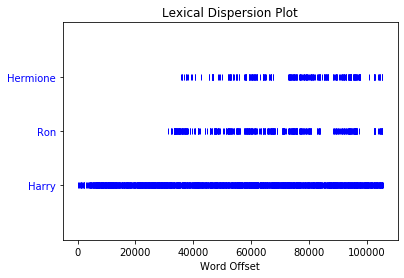

In [30]:
harry_potter_text1.dispersion_plot(protagonistas)

En cuanto a los secundarios, destaca la presencia de Hagrid en este libro. Junto con la profesora McGonagall y Dumbledore son los primeros personajes que conocemos, ya que son los encargados de llevar a Harry a casa de sus tios tras el asesinato de sus padres a manos de Voldemort (que es el otro que se menciona al principio de la historia). 

Por supuesto, Quirrell toma protagonismo hacia el final, ya que interviene en el desenlace del libro al intertar hacerse poseedor de la piedra filosofal.

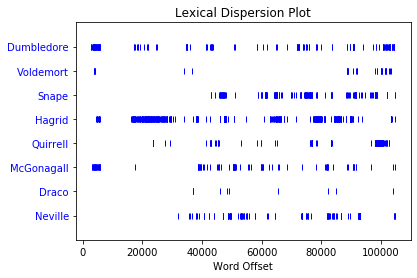

In [11]:
harry_potter_text1.dispersion_plot(secundarios1)

### Harry Potter y la cámara secreta.

En general las estructura gramatical se mantiene en este libro, solo que los pronombres pierden un puesto en favor de los determinantes. Continúan destacando los verbos en pasado.

In [12]:
info2_2

Tipo de palabra,NNP,NN,IN,VBD,DT,PRP,",",JJ,.,RB,...,'',FW,NNPS,),(,RBS,WP$,$,``,POS
Total,15893,13768,9733,9016,7676,7252,6686,6618,6288,5320,...,80,52,40,36,32,25,13,10,8,4


De nuevo, podemos ver el mismo ranking. Harry, obviamente, es el más mencionado, Ron es el segundo y Hermione la tercera. Aunque, ambos ganan protagonismo, y ahora sí aparecen desde el principio.

Tiene sentido, puesto que, por una parte Ron rescata a Harry en coche de casa de sus tios, y por otro lado, Hermione se pasa el final del libro petrificada, luego participa en menos aventuras.

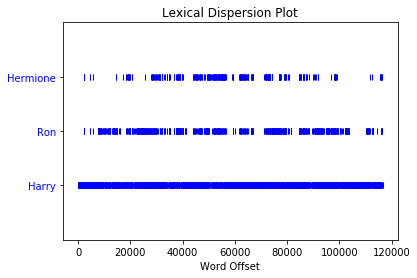

In [13]:
harry_potter_text2.dispersion_plot(protagonistas)

En cuanto a los personajes secundarios, destaca en primer lugar lo poco que aparece Voldemort en este tomo. Pero tiene sentido, ya que en muchas ocasiones se le nombra como Tom Riddle o *el heredero*.

Además, vemos que entre los profresores destaca Gilderoy Lockhart, llevando a cabo su papel de impostor. 

Entre los otros alumnos podemos ver que Draco Malfoy aparece más que otros como Neville, debido a que en gran parte del libro se piensa que es él quien puede abrir la cámara.

Es importante también, destacar la aparición en tres partes muy marcadas del carismático Dobby, quien visita a Harry al principio, le ayuda en mitad del libro y al final se gana su amistad.

Por último recalcar la importancia del basilisco en la batalla final. También destaca al final Dumbledore, esto será una constante en todos los libros debido a aquellas entrañables charlas que siempre tenía con Harry al final de cada curso.

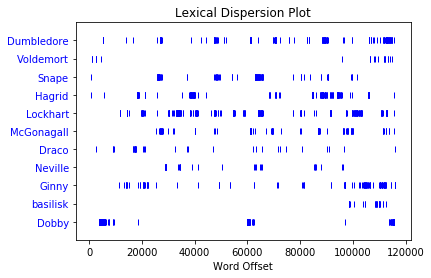

In [14]:
harry_potter_text2.dispersion_plot(secundarios2)

### Harry Potter y el prisionero de Azkaban.

Sin cambios en el análisis gramatical como era de esperar.

In [15]:
info3_2

Tipo de palabra,NNP,NN,IN,VBD,PRP,DT,.,",",JJ,RB,...,UH,FW,NNPS,),(,RBS,WP$,``,$,POS
Total,20830,17347,12296,11553,9500,9472,8803,8344,8106,6920,...,108,99,61,57,39,35,19,9,7,6


Vemos que en esta entrega cabe destacar que, se equiparan las apariciones de Ron y Hermione, tomándo esta última más protagonismo con respecto a los anteriores libros. Además se observa que Hermione toma protagonismo especialmente hacia el final, lo cual encaja a la perfección, ya que es cuando tiene lugar la trama del giratiempos.

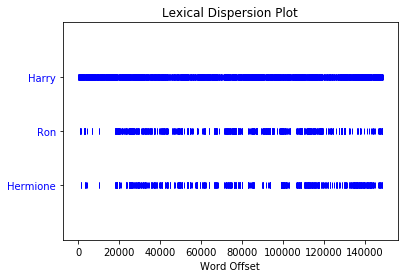

In [16]:
harry_potter_text3.dispersion_plot(protagonistas)

En cuanto a los secundarios, destaca la aparición de Sirius. En espcial en el final de la historia, Sirius Black, Peter Pettigrew y Remus Lupin toman protagonismo por su aventura en la casa de los gritos.

Vuelve a aparecer, aunque no demasiado el nombre de Voldemort.

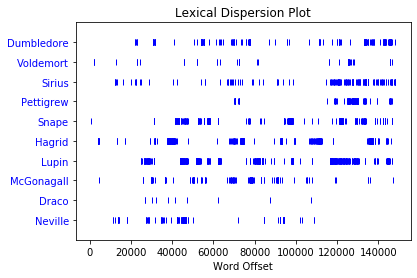

In [17]:
harry_potter_text3.dispersion_plot(secundarios3)

### Harry Potter y el cáliz de fuego.

Sin cambios, como era de esperar, en la estructura gramatical.

In [18]:
info4_2

Tipo de palabra,NNP,NN,IN,VBD,DT,PRP,",",.,JJ,RB,...,PDT,FW,NNPS,),(,RBS,WP$,$,``,POS
Total,33060,29050,22481,19654,16974,16808,15030,14265,13858,12635,...,212,142,94,81,75,48,38,26,10,2


Hermione y Ron tienen de nuevo protagonismo a partes iguales. Resalta ese hueco al final en el que ninguno aparece, pero tiene sentido debido a que se corresponde con la parte de la historia en la que Harry se sumerge en la última prueba, el laberinto, que a su vez le lleva al cementerio.

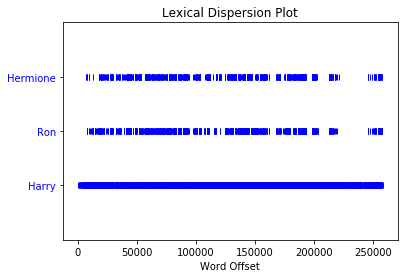

In [19]:
harry_potter_text4.dispersion_plot(protagonistas)

En esta entrega Voldemort toma fuerza, sobre todo al final cuando vuelve a aparecer en el cementerio con la ayuda de su fiel Colagusano.

También podemos observar como, en este libro, los compañeros como Draco o Neville ceden protagonismo a los campeones del torneo (Viktor Krum, Fleur Delacour y Cedric Diggory).

En cuanto a profesores podemos destacar en este tomo a *ojo loco* Moody, y su trama con Barty Crouch.

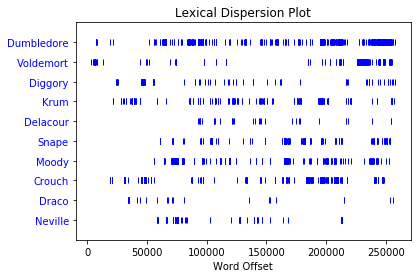

In [20]:
harry_potter_text4.dispersion_plot(secundarios4)

### Harry Potter y la orden del fénix.

Ninguna sorpresa en la estructura gramatical.

In [21]:
info5_2

Tipo de palabra,NNP,NN,IN,VBD,PRP,DT,",",JJ,RB,.,...,FW,NNPS,),(,WP$,RBS,$,``,POS,SYM
Total,42984,40103,30562,26215,23330,23101,19985,19121,18296,16057,...,238,93,81,72,55,50,48,24,7,1


Como venía siendo tónica, Ron y Hermione tienen protagonismo equitativo. Además, en esta entrega ambos tienen una aparición continuada de principio a fin.

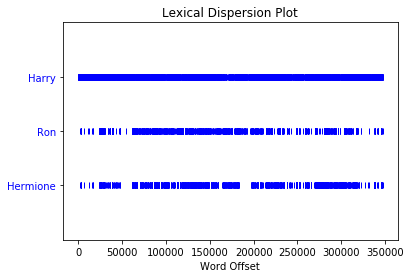

In [22]:
harry_potter_text5.dispersion_plot(protagonistas)

Voldemort recupera fuerza en esta entrega, ya que se va alcanzando el final de la saga. Destaca especialmente Dumbledore como promotor de la orden.

Vuelve a tener presencia Sirius, que no tuvo demasiada en el cuarto libro, así como algunos mortífagos como Bellatrix.

Como proferosa destacada en esta entrega destaca Dolores Umdridge, que sin duda trajo de cabeza a los protagonistas y a los lectores durante todo el libro.

Por último remarcar la aparición del ministro de magia Cornelius Fudge como figura importante. También la de Luna Lovegood como amiga de Harry e integrante de la orden.

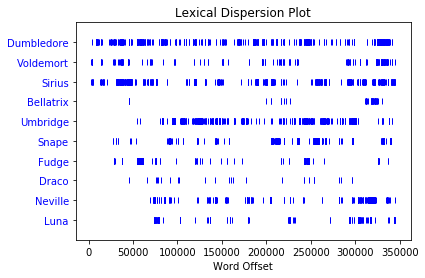

In [23]:
harry_potter_text5.dispersion_plot(secundarios5)

### Harry Potter y el príncipe mestizo.

Sin sorpresas gramaticales.

In [24]:
info6_2

Tipo de palabra,NNP,NN,IN,VBD,PRP,DT,",",JJ,RB,.,...,PDT,FW,RBS,NNPS,),(,WP$,$,``,POS
Total,30261,25472,19131,16974,15785,14486,14248,13169,11676,11177,...,214,151,81,79,57,55,28,28,28,9


Parece interesante que las partes de la historia en las que no aparece Ron, no aparece Hermione, y viceversa. Es decir, tienen parones bastante marcados. Tiene lógica y coincide con las aventuras de Harry y Dumbledore en solitario.

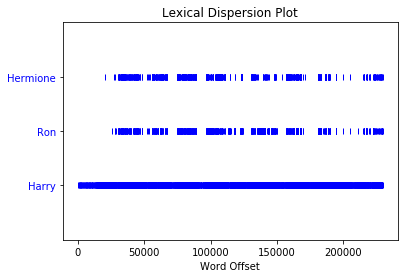

In [25]:
harry_potter_text6.dispersion_plot(protagonistas)

Destaca el protagonismo que toma Dumbledore en este libro, de hecho es el tomo en el que resulta ser más importante. Sobre todo al final por ese acontecimiento que todo buen fan conoce.

Entre los profesores destacan Snape (va tomando protagonismo en el final de la saga) y Slughorn, el nuevo profesor de pociones.

Se observa que los compañeros de Harry (Draco, Neville, Luna...) no tienen demasiadas apariciones en esta entrega.

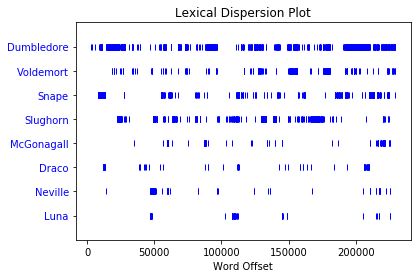

In [26]:
harry_potter_text6.dispersion_plot(secundarios6)

### Harry Potter y las reliquias de la muerte.

Todo en orden, como era de esperar, la estructura se mantiene constante a lo largo de la saga.

In [27]:
info7_2

Tipo de palabra,NNP,NN,IN,VBD,PRP,DT,",",JJ,.,RB,...,PDT,FW,NNPS,RBS,WP$,),(,``,$,POS
Total,32341,30137,22431,20997,18890,18037,16149,14645,13641,11979,...,179,148,109,60,56,36,24,22,18,7


Es importante destacar que en la última entrega, Hermione tiene más protagonismo que Ron, el mejor amigo de Harry. Salta a la vista ese hueco de Ron a mediados de la novela. Se debe a que durante un pequeño periodo de tiempo Ron Weasly, decide abandonarlos en su aventura debido a los efectos negativos de uno de los horrocruxes.

Además, ambos desaparecen en partes del final dejando a Harry todo el protagonismo en su lucha contra Lord Voldemort.

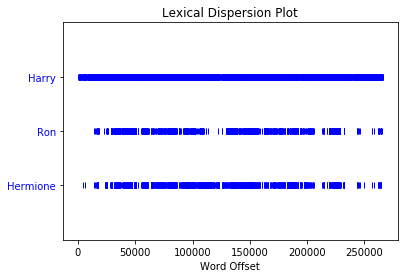

In [28]:
harry_potter_text7.dispersion_plot(protagonistas)

Voldemort es más protagonista que ningún otro libro, como era de esperar. Así como sus mortífagos, entre ellos destaca Bellatrix. 

Es curioso que Dumbledore sigue siendo un personaje importante, no diré más. Además, Snape tiene su momento de gloria en la saga, se puede observar esa marcada aparición hacia el final.

Entre los amigos de Harry destacan Neville, por su relación con la profecía, y Ginny, por su historia de amor con Harry.

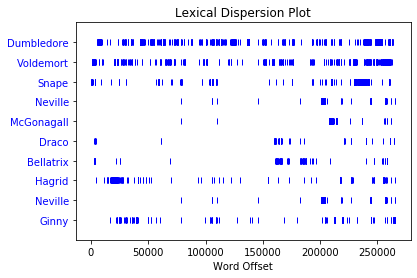

In [29]:
harry_potter_text7.dispersion_plot(secundarios7)